# Low-Rank Gaussian Coefficients and Covariance Geometry

## Model

$$
x = W z + \varepsilon,\quad \Sigma = W W^\top + \sigma^2 I_d
$$

Coefficient changes are restricted to
$$
\Delta W = B A.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import slogdet, inv

rng = np.random.default_rng(1)

In [2]:
d = 40
k = 8
sigma = 0.1
n = 1500

W0 = rng.normal(size=(d, k))

In [3]:
def covariance(W):
    return W @ W.T + sigma**2 * np.eye(d)

def nll(S, W):
    Sigma = covariance(W)
    sign, logdet = slogdet(Sigma)
    return 0.5 * (logdet + np.trace(inv(Sigma) @ S))

In [4]:
rank_star = 2
B = rng.normal(size=(d, rank_star))
A = rng.normal(size=(rank_star, k))
DeltaW_lr = B @ A

D = rng.normal(size=(d, k))
DeltaW_dense = D / np.linalg.norm(D, 'fro') * np.linalg.norm(DeltaW_lr, 'fro')

def sample(W):
    z = rng.normal(size=(n, k))
    eps = sigma * rng.normal(size=(n, d))
    return z @ W.T + eps

S_lr = (sample(W0 + DeltaW_lr).T @ sample(W0 + DeltaW_lr)) / n
S_dense = (sample(W0 + DeltaW_dense).T @ sample(W0 + DeltaW_dense)) / n

## Rank Sweep

In [5]:
ranks = [0, 1, 2, 4, 8]
nll_lr = []
nll_dense = []

for r in ranks:
    if r == 0:
        W = W0
    else:
        B = rng.normal(size=(d, r))
        A = rng.normal(size=(r, k))
        W = W0 + B @ A

    nll_lr.append(nll(S_lr, W))
    nll_dense.append(nll(S_dense, W))

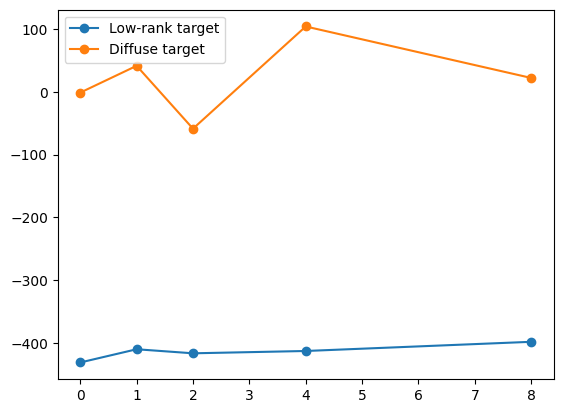

In [6]:
plt.plot(ranks, nll_lr, marker='o', label='Low-rank target')
plt.plot(ranks, nll_dense, marker='o', label='Diffuse target')
plt.legend()
plt.show()